In [88]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img
from IPython.display import Image

In [89]:
with MPRester("uV0oAcDvINnFw7CK") as m:

    # Structure for material id
    bdstructure = m.get_bandstructure_by_material_id("mp-961711")

# Détermination bande interdite:

Bande direct:  False
Gap bande interdire:  1.3281 eV


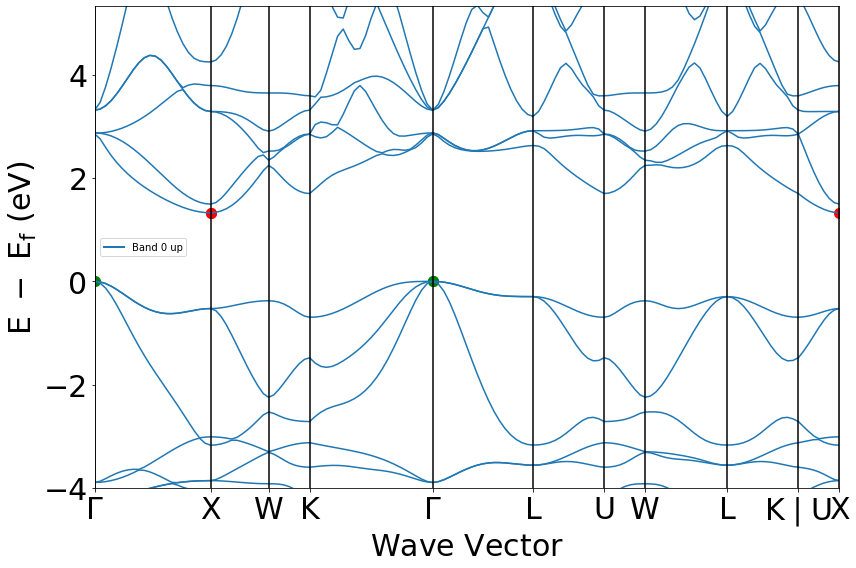

In [90]:
BSPlott = BSPlotter(bdstructure)
BSPlott.get_plot(vbm_cbm_marker=True)
BdGap = bdstructure.get_band_gap()

print("Bande direct: ", BdGap["direct"])
print("Gap bande interdire: ", BdGap["energy"], "eV")

Si la bande de conduction est vide mais que la gap est de l'ordre de 1 à 2 eV. Le solide est donc isolant à température nulle, mais une élévation de température permet de faire passer des électrons de la bande de valence à la bande de conduction.

# Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

In [91]:
data = BSPlott.bs_plot_data()
e = data.get('energy')
dist = data.get('ticks').get('distance')

# Array ne contennant pas de distance redondante
d = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[15], dist[17], dist[18]])

# Distance entre chaque branche
d_branch = d[1:] - d[0:-1]

In [92]:
# Dernière bande de valance (12ème bande)
bv = list(bdstructure.get_vbm()['band_index'].values())[0]
print("Bandes de valences contennant les énergies les plus haute: ", bv)

# Calcul de la pente entre chaque branche
slope_v = np.zeros(np.shape(d_branch))
for i in range(np.size(d_branch)):
    slope_v[i] = ((e.get('1')[i][12][-1]) - (e.get('1')[i][12][0])) / d_branch[i]

# Calcul le minimum et maximum des pentes
max_v = np.max(np.abs(slope_v))
min_v = np.min(np.abs(slope_v))

Bandes de valences contennant les énergies les plus haute:  [10, 11, 12]


In [93]:
# Première bande de conduction (13ème bande)
bc = list(bdstructure.get_cbm()['band_index'].values())[0]
print("Bande de conduction contennant l'énergie la plus basse : {}\nLa première bande de conduction est la 13ème bande\n".format(bc))

# Calcul de la pente entre chaque branche
slope_c =  np.zeros(np.shape(d_branch))
for i in range(np.size(d_branch)):
    slope_c[i] = ((e.get('1')[i][13][-1]) - (e.get('1')[i][13][0])) / d_branch[i]

# Calcul le minimum et maximum des pentes
max_c = np.max(np.abs(slope_c))
min_c = np.min(np.abs(slope_c))

Bande de conduction contennant l'énergie la plus basse : [13]
La première bande de conduction est la 13ème bande



Dispertion sur la dernière bande de valence 

La plus grande dispertion pour la dernière bande de valence vaut : 0.8817731911757072 Elle est représentée par une flèche rouge sur la bande de valance 

La plus faible dispertion pour la dernière bande de valence vaut : 0.11101659964159365 Elle est représentée par une flèche verte sur la bande de valance 

Dispertion sur la première bande de conduction 

La plus grande dispertion pour la première bande de conduction vaut : 1.7952488700772304 Elle est représentée par une flèche jaune sur la bande de conduction 
 
La plus faible dispertion pour la première bande de conduction vaut : 0.2566948801399382 Elle est représentée par une flèche bleu sur la bande de valance 



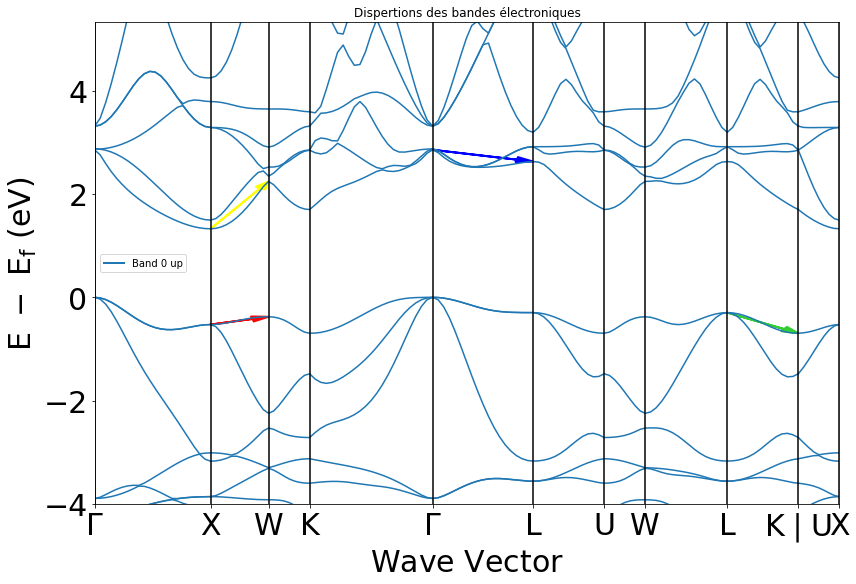

In [94]:
BSPlott.get_plot()

# Flèche représentant la pente maximum de la dernière bande de valence
plt.arrow(d[1], (e.get('1')[1][12][0]), d_branch[1],(e.get('1')[1][12][-1]) - (e.get('1')[1][12][0]), color='red', head_width = 0.1, linewidth=2, length_includes_head=True)

# Flèche représentant la pente minimum de la dernière bande de valence
plt.arrow(d[8], (e.get('1')[8][12][0]), d_branch[8],(e.get('1')[8][12][-1]) - (e.get('1')[8][12][0]), color='limegreen', head_width = 0.1, linewidth=2, length_includes_head=True)

# Flèche représentant la pente maximum de la première bande de conduction
plt.arrow(d[1], (e.get('1')[1][13][0]), d_branch[1],(e.get('1')[1][13][-1]) - (e.get('1')[1][13][0]), color='yellow', head_width = 0.1, linewidth=2, length_includes_head=True)

# Flèche représentant la pente maximum de la première bande de conduction
plt.arrow(d[4], (e.get('1')[4][13][0]), d_branch[4],(e.get('1')[4][13][-1]) - (e.get('1')[4][13][0]), color='blue', head_width = 0.1, linewidth=2, length_includes_head=True)

print('Dispertion sur la dernière bande de valence \n')
print('La plus grande dispertion pour la dernière bande de valence vaut :', max_v,"Elle est représentée par une flèche rouge sur la bande de valance \n")
print('La plus faible dispertion pour la dernière bande de valence vaut :', min_v, "Elle est représentée par une flèche verte sur la bande de valance \n")
print('Dispertion sur la première bande de conduction \n')
print('La plus grande dispertion pour la première bande de conduction vaut :', max_c,"Elle est représentée par une flèche jaune sur la bande de conduction \n ")
print('La plus faible dispertion pour la première bande de conduction vaut :', min_c,"Elle est représentée par une flèche bleu sur la bande de valance \n")


plt.title("Dispertions des bandes électroniques")
plt.show()

# Masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.


### La masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l'énergie E par rapport au vecteur d'onde k

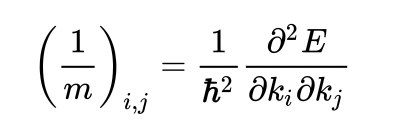

In [95]:
Image(filename='masse_efective.png')

### En supposant une dispersion parabolique, l'énergie E(k) peut être approximée par une equation du second degré: E(k) = ak^2 + bk + c

### a, b, c seront déterminées à partir de la connaissanse de trois points.

In [96]:
print("Maximums de la bande de valence : ",data['vbm'], "\n")
print("Minimums de la bande conduction : ",data['cbm'])

Maximums de la bande de valence :  [(0.0, 0.0), (2.981013872306062, 0.0), (2.981013872306062, 0.0)] 

Minimums de la bande conduction :  [(1.0229222424860795, 1.3281), (1.0229222424860795, 1.3281), (6.566339799289289, 1.3281)]


In [97]:
# Bande de valence
x_v = [data.get('distances')[3][-2], data.get('distances')[4][0], data.get('distances')[4][2]]
y_v = [e.get('1')[3][12][-2], e.get('1')[4][12][0], e.get('1')[4][12][2]]

# Calcul des constantes a,b,c
abc_v = np.polyfit(x_v, y_v, 2)


def f_v(k):
    return abc_v[0]*k*k + abc_v[1]*k + abc_v[2]

x_plot_v = np.arange(0, 6, 0.01)
y_plot_v = f_v(x_plot_v)

In [98]:
# Bande de conduction
x_c = [data.get('distances')[0][-2], data.get('distances')[1][0], data.get('distances')[1][2]]
y_c = [e.get('1')[0][13][-2], e.get('1')[1][13][0], e.get('1')[1][13][2]]

# Calcul des constantes a,b,c
abc_c = np.polyfit(x_c, y_c, 2)


def f_c(k):
    return abc_c[0]*k*k + abc_c[1]*k + abc_c[2]

x_plot_c = np.arange(0, 2, 0.01)
y_plot_c = f_c(x_plot_c)

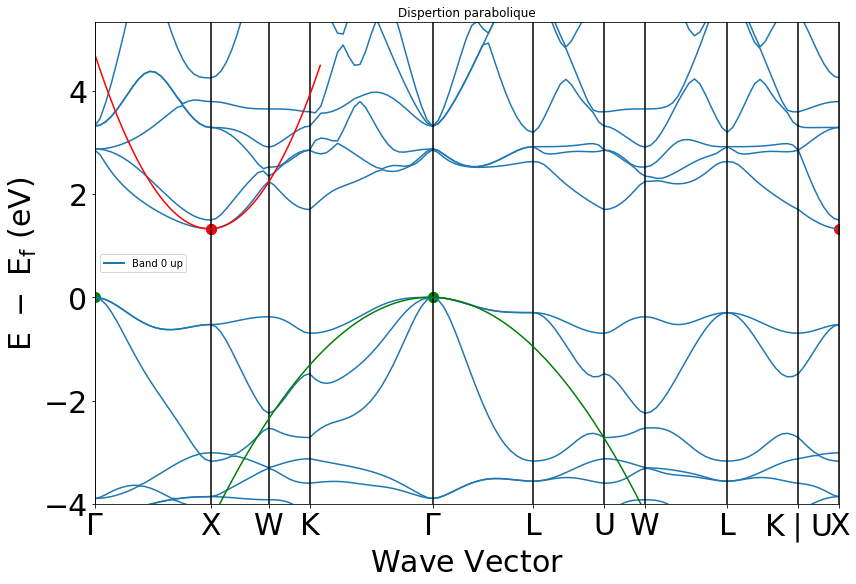

In [99]:
BSPlott.get_plot(vbm_cbm_marker=True)
# Paraboles
plt.plot(x_plot_v, y_plot_v, color='green')
plt.plot(x_plot_c, y_plot_c, color='red')
plt.title("Dispertion parabolique")
plt.show()

In [100]:
# Masse effective au sommet de la dernière bande de valence

print('Equation de la parabole : E(k) = ', abc_v[0],"k² +" , abc_v[1],"k +", abc_v[2])
print("Dérivée seconde de E  = ", 2*abc_v[0], "[eV.A²]")
print("A=",10**-10,"[m]")
print("eV=",1.602176634*(10**-19),"[J] \n")
print('On adapte les unités de la dérivée seconde :')
print("E'' = ", 2*abc_v[0]*((10**-10)**2)*(1.602176634*(10**-19)), '[J.m²]')
print("h_barre=",1.054571817*(10**-34),"[Js] \n")
print("La masse effective vaut :  h_barre/E''")

# masse 
print('=> m* = ',abs(((1.054571817*(10**-34))**2)/(2*abc_v[0]*((10**-10)**2)*(1.602176634*(10**-19)))),'[kg] au sommet de la bande de valence')



Equation de la parabole : E(k) =  -1.1619644998756202 k² + 6.878470842407287 k + -10.179084883929836
Dérivée seconde de E  =  -2.3239289997512405 [eV.A²]
A= 1e-10 [m]
eV= 1.6021766340000001e-19 [J] 

On adapte les unités de la dérivée seconde :
E'' =  -3.72334474247643e-39 [J.m²]
h_barre= 1.054571817e-34 [Js] 

La masse effective vaut :  h_barre/E''
=> m* =  2.9868889241531776e-30 [kg] au sommet de la bande de valence


In [101]:
# Masse effective au à la base de la première bande de conduction 

print('Equation de la parabole : E(k) = ', abc_c[0],"k² +" , abc_c[1],"k +", abc_c[2])
print("Dérivée seconde de E  = ", 2*abc_c[0], "[eV.A²]")
print("A=",10**-10,"[m]")
print("eV=",1.602176634*(10**-19),"[J] \n")
print('On adapte les unités de la dérivée seconde :')
print("E'' = ", 2*abc_c[0]*((10**-10)**2)*(1.602176634*(10**-19)), '[J.m²]')
print("h_barre=",1.054571817*(10**-34),"[Js] \n")
print("La masse effective vaut :  h_barre/E''")

# masse 
print('=> m* = ',abs(((1.054571817*(10**-34))**2)/(2*abc_c[0]*((10**-10)**2)*(1.602176634*(10**-19)))),'[kg] au sommet de la bande de conduction')

Equation de la parabole : E(k) =  3.3155875341778933 k² + -6.714054698655532 k + 4.726724844952953
Dérivée seconde de E  =  6.631175068355787 [eV.A²]
A= 1e-10 [m]
eV= 1.6021766340000001e-19 [J] 

On adapte les unités de la dérivée seconde :
E'' =  1.0624313750482997e-38 [J.m²]
h_barre= 1.054571817e-34 [Js] 

La masse effective vaut :  h_barre/E''
=> m* =  1.0467704016742942e-30 [kg] au sommet de la bande de conduction
